<a href="https://colab.research.google.com/github/barbiwachlin/Proyecto-Final-Ciencia-de-Datos-I/blob/main/%E2%80%9CProyectoDS_ParteI_%2BWachlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

Este trabajo tiene como finalidad analizar el comportamiento de ventas de una supertienda global durante el año 2018, utilizando un conjunto de datos que contiene información detallada sobre más de 3.000 transacciones. Las variables incluidas abarcan aspectos como la fecha del pedido y del envío, el modo de entrega, el segmento del cliente, datos geográficos (ciudad, estado y región), y características del producto (categoría, subcategoría, nombre), junto con el monto de ventas en dólares. A partir de esta base, se formularon tres hipótesis: (1) que el segmento “Corporate” generaría mayores ventas que “Consumer”, (2) que la categoría “Technology” tendría mayores ingresos promedio que “Office Supplies”, y (3) que las ventas aumentarían en el último trimestre del año.

Se elaboraron gráficos multivariados para analizar estas hipótesis, incluyendo comparaciones por segmento, categoría y trimestre. Los resultados mostraron que el segmento “Consumer” lidera en ventas, especialmente en la categoría “Technology”, lo que refuta la primera hipótesis. En cambio, la segunda y tercera hipótesis se confirman: los productos tecnológicos generan ingresos significativamente mayores y las ventas se incrementan notablemente en el cuarto trimestre, lo cual podría asociarse a eventos comerciales de fin de año.

Este análisis aporta información relevante para la toma de decisiones comerciales, permitiendo identificar cuáles segmentos y categorías son más rentables y en qué momentos del año se concentran las mayores oportunidades de venta.

# Base de datos elegida


El conjunto de datos fue extraído de la pagina Kaggle en el siguiente enlace https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting e incluye información detallada sobre las ventas minoristas de una supertienda global durante 4 años. Para la realización del trabajo se tomó la decisión de analizar los datos correspondientes a las ordenes solicitadas durante el año 2018 las cuales representan alrededor de 3.000 registros. Por lo tanto los datos abarcan ordenes desde enero de 2018 hasta diciembre de 2018 e incluyen los siguientes atributos:


1. Row ID
2. Order ID
3. Order Date
4. Ship Date
5. Ship Mode
6. Customer ID
7. Customer Name
8. Segment
9. Country
10. City
11. State
12. Postal
13. Code
14. Region
15. Product ID
16. Category
17. Sub-Category
18. Product Name
19. Sales

# Importacion de libreria y base de datos


In [ ]:
## Importación de Libreria Panda
import pandas as pd
import numpy as np

## Importación de base de datos
df=pd.read_excel("/content/drive/MyDrive/CODERHOUSE/Ciencia de datos/Primera parte/Entrega 1/Data base elegida y ajustada.xlsx")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,13,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552
1,24,US-2018-156909,2018-07-16,2018-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372
2,35,CA-2018-107727,2018-10-19,2018-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095.0,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472
3,42,CA-2018-120999,2018-09-10,2018-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540.0,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168
4,44,CA-2018-139619,2018-09-19,2018-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935.0,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,9769,CA-2018-142328,2018-12-07,2018-12-14,Standard Class,TC-21535,Tracy Collins,Home Office,United States,San Francisco,California,94122.0,West,OFF-PA-10000380,Office Supplies,Paper,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",50.040
3254,9788,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.332
3255,9789,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558
3256,9790,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,39.992


# Hipótesis

Nuestro objetivo es determinar si las siguientes afirmaciones son verdaderas:

1. "Las ventas en el segmento 'Corporate' son mayores, en promedio, que en el segmento 'Consumer' durante 2018."

2. "La categoría 'Technology' genera mayores ingresos promedio por pedido que 'Office Supplies'."

3. "Las ventas aumentan en el último trimestre del año."

# Gráficos

<ipython-input-6-ae5be97be923>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Segment', y='Sales', hue='Category', ci=None)


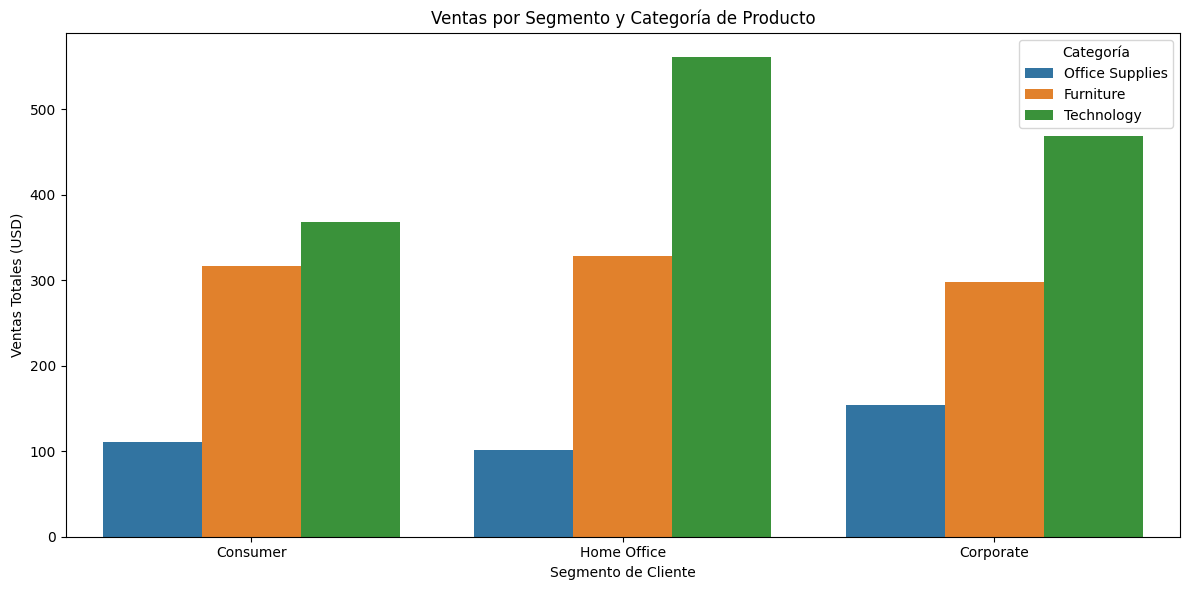

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocesamiento
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)

## Gráfico 1: Segmento vs Categoría vs Ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Segment', y='Sales', hue='Category', ci=None)
plt.title('Ventas por Segmento y Categoría de Producto')
plt.ylabel('Ventas Totales (USD)')
plt.xlabel('Segmento de Cliente')
plt.legend(title='Categoría')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El primer gráfico muestra cómo varían las ventas según el segmento de clientes y la categoría de productos. Se observa que el segmento “Consumer” es el que genera mayores ventas totales, especialmente dentro de la categoría “Technology”. Esto sugiere que los consumidores individuales representan un mercado clave para los productos tecnológicos. En cambio, el segmento “Home Office” presenta un volumen de ventas considerablemente menor en todas las categorías, lo que indica que podría ser un nicho con menor demanda o menor capacidad de compra. Este análisis permite plantear estrategias de marketing segmentadas según el tipo de cliente, enfocando los esfuerzos donde hay mayor retorno.

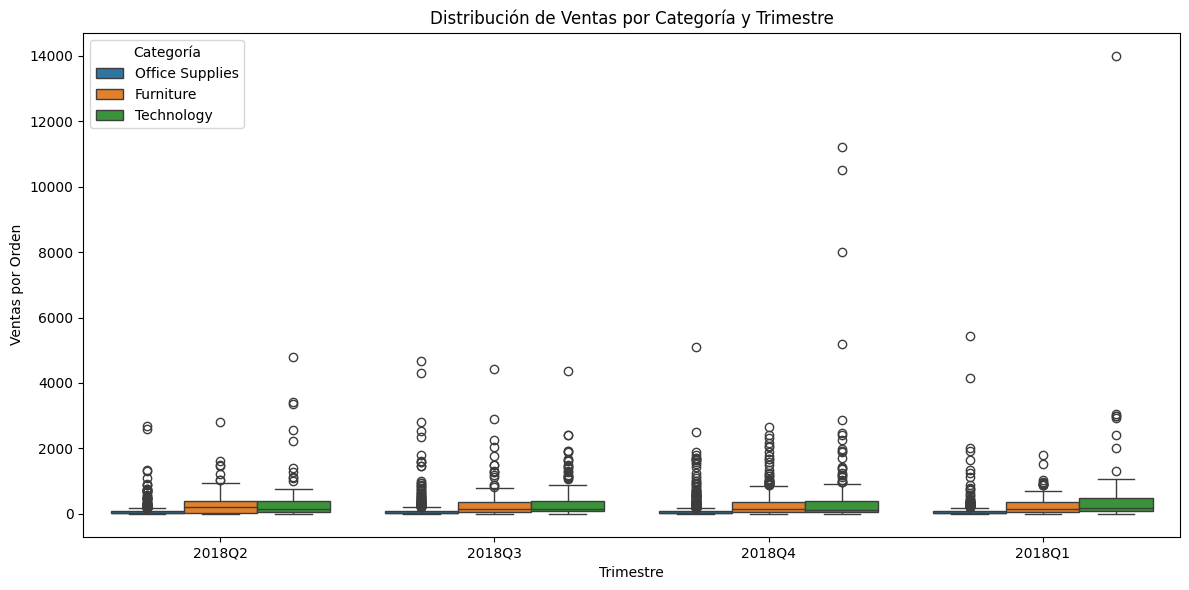

In [ ]:
## Gráfico 2: Categoría vs Trimestre vs Ventas promedio
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Quarter', y='Sales', hue='Category')
plt.title('Distribución de Ventas por Categoría y Trimestre')
plt.ylabel('Ventas por Orden')
plt.xlabel('Trimestre')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

En el segundo gráfico, se analiza la distribución de las ventas a lo largo del año agrupadas por trimestre y categoría. Se identifica un incremento en el volumen de ventas durante el cuarto trimestre (Q4), especialmente en la categoría “Technology”, que no solo muestra una mediana más alta sino también una mayor dispersión de los valores. Esto puede deberse a eventos comerciales de fin de año como el Black Friday o las compras navideñas, que suelen incentivar el consumo de tecnología. En contraste, la categoría “Office Supplies” mantiene una distribución más estable, sin grandes variaciones entre trimestres. Este comportamiento estacional puede ser clave a la hora de planificar campañas comerciales o asignar recursos en función del calendario.

<ipython-input-9-fab3ddff1115>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Ship Mode', y='Sales', hue='Category', ci=None)


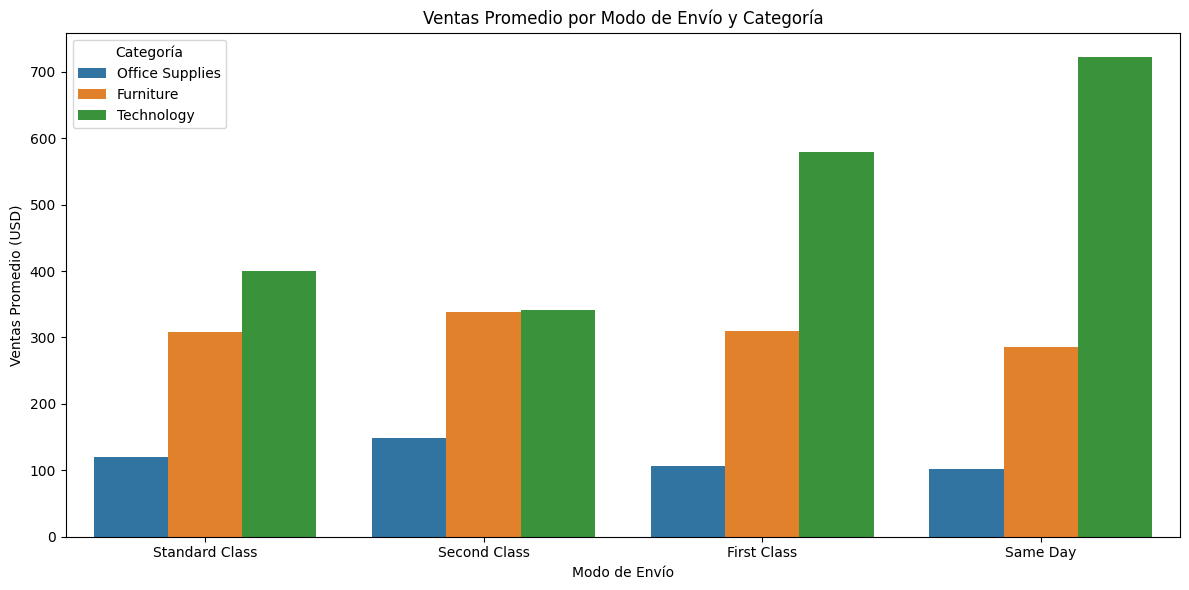

In [ ]:
## Gráfico 3: Modo de Envío vs Categoría vs Ventas promedio
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Ship Mode', y='Sales', hue='Category', ci=None)
plt.title('Ventas Promedio por Modo de Envío y Categoría')
plt.ylabel('Ventas Promedio (USD)')
plt.xlabel('Modo de Envío')
plt.legend(title='Categoría')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El tercer gráfico examina la relación entre el modo de envío, la categoría del producto y el valor de las ventas. Se destaca que los pedidos enviados mediante el servicio “Same Day” tienden a estar asociados a ventas de mayor valor, particularmente en la categoría “Technology”. Esto sugiere que los clientes que adquieren productos costosos están más dispuestos a pagar por envíos rápidos. Por el contrario, el servicio de envío más utilizado, “Standard Class”, presenta montos de venta promedio más bajos, lo cual es esperable en productos menos urgentes o de menor costo. Este análisis permite entender cómo se comporta la logística en relación con el tipo de producto y su precio.

# Vinculación con las hipótesis

Los gráficos y análisis realizados permiten evaluar con evidencia empírica las hipótesis planteadas inicialmente. En primer lugar, se propuso que las ventas en el segmento “Corporate” serían mayores, en promedio, que en el segmento “Consumer”. Sin embargo, el primer gráfico muestra que es el segmento “Consumer” el que genera mayores ventas totales, especialmente en productos de tecnología, lo que permite rechazar parcialmente la hipótesis y reorientar el foco hacia el consumidor individual como principal impulsor de ingresos.

La segunda hipótesis sostenía que la categoría “Technology” generaría mayores ingresos promedio por pedido que “Office Supplies”. Esto se confirma tanto en el primer gráfico como en el tercero: los productos de tecnología no solo tienen mayores ventas en segmentos clave, sino que además se asocian con modos de envío más costosos como “Same Day”, lo que indica un mayor valor de transacción. Esta evidencia permite aceptar la hipótesis y sugiere que la categoría de tecnología es estratégica para maximizar ingresos.

Finalmente, se planteó que las ventas aumentarían en el último trimestre del año. El gráfico de distribución por trimestres confirma esta tendencia, mostrando un pico en las ventas durante el cuarto trimestre, en especial para la categoría “Technology”. Este comportamiento estacional valida la hipótesis y aporta una dimensión temporal clave para la planificación comercial.

En conjunto, los análisis gráficos y numéricos permiten evaluar con mayor profundidad las preguntas de interés, aportando información útil para la toma de decisiones estratégicas en torno al segmento de clientes, el tipo de producto y el momento del año más favorable para impulsar ventas.

